In [4]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

In [34]:

# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv("joanne.env")

True

In [35]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [36]:
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [37]:

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)


In [42]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 5 years ago.
start_date = pd.Timestamp("2016-04-08", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-04-08", tz="America/New_York").isoformat()

# Set the ticker information
tickers = ["AMZN"]

# Get 5 year's worth of historical price data
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Display sample data
df_ticker.shape[0]

1000

In [44]:
# Configure a Monte Carlo simulation to forecast ten years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = [1],
    num_simulation = 500,
    num_trading_days = 252*5
)

# Print the simulation input data
MC_even_dist.portfolio_data.head()

AMZN                                    \
                             open    high      low   close   volume   
time                                                                  
2017-04-19 00:00:00-04:00  907.84  910.50  897.369  899.03  1990727   
2017-04-20 00:00:00-04:00  899.70  905.32  896.290  902.06  1929509   
2017-04-21 00:00:00-04:00  902.67  903.65  896.770  898.53  1689221   
2017-04-24 00:00:00-04:00  908.68  909.99  903.820  907.35  2196873   
2017-04-25 00:00:00-04:00  907.01  909.48  903.000  907.63  2362488   

                                        
                          daily_return  
time                                    
2017-04-19 00:00:00-04:00          NaN  
2017-04-20 00:00:00-04:00     0.003370  
2017-04-21 00:00:00-04:00    -0.003913  
2017-04-24 00:00:00-04:00     0.009816  
2017-04-25 00:00:00-04:00     0.000309

In [45]:
# Run a Monte Carlo simulation to forecast ten years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.027365,1.009578,0.991358,0.983254,1.006418,0.997832,1.049527,0.976549,1.029065,0.997103,...,0.985173,1.040254,0.953828,1.001438,0.985616,1.038298,1.013435,0.999638,0.996280,0.974468
2,1.013910,1.022340,0.998334,0.957848,1.020671,1.005012,1.048296,0.979255,1.037041,1.003873,...,1.015195,1.025221,0.968321,1.024981,0.980773,1.032831,0.998475,1.019921,1.000632,0.967434
3,1.014908,1.015681,0.973145,0.934145,1.027806,1.016391,1.054996,1.024767,0.984395,0.998042,...,0.992029,1.045432,0.981699,1.053340,1.002288,1.015779,0.981180,0.995600,0.986455,0.960963
4,1.024783,1.040130,0.981577,0.924313,0.996561,1.001392,1.068499,1.036918,0.947632,1.018638,...,0.993642,1.028596,0.958609,1.045112,0.987807,1.016162,1.005401,0.997096,1.031616,0.922089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,7.488288,2.094612,15.263578,8.936724,4.516578,3.603760,2.099864,3.967748,6.977478,2.793488,...,5.819657,2.009262,3.490610,13.332229,10.992246,7.355537,7.470787,6.258060,6.693085,11.201852
1257,7.670501,2.029795,15.103944,9.149362,4.640994,3.545377,2.071751,3.921183,7.006695,2.859885,...,5.670985,2.033585,3.518418,13.895468,10.834916,7.113468,7.310249,6.515955,6.847890,10.993335
1258,7.568914,2.065650,14.969493,9.169213,4.592849,3.536316,2.065604,3.885831,7.072022,2.889425,...,5.600763,2.000803,3.478367,13.988197,10.487154,7.124616,7.309367,6.654136,6.860800,10.789679
1259,7.780512,2.092965,14.888709,9.042482,4.517004,3.554376,2.077549,3.864229,6.997556,2.825929,...,5.681014,1.966114,3.425047,14.369236,10.818516,7.316059,7.116706,6.553480,6.902076,10.636950


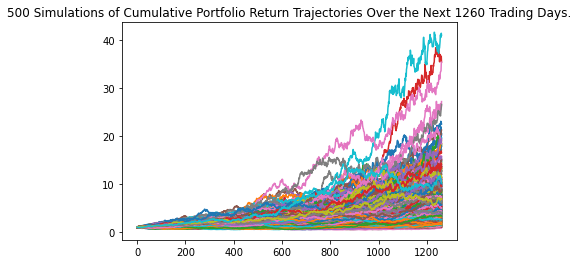

In [46]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

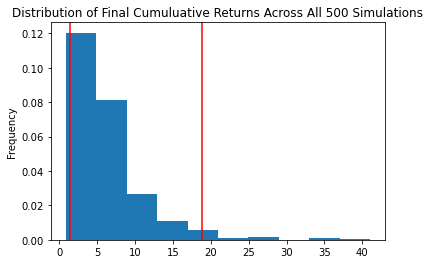

In [47]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

In [48]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean              6.312667
std               4.902855
min               0.855314
25%               3.098864
50%               5.094080
75%               7.817283
max              41.043432
95% CI Lower      1.359080
95% CI Upper     18.809994
Name: 1260, dtype: float64
